<div style="background-color:lightgray; color:black; padding:10px; border-radius:5px;">
  <h1>Sprint 6</h1>
</div>

## Tarea 6: Pre procesado y transformación de datos

## 🎯 **Objetivo:**
Preparar los datos para entrenar a un modelo.

---

### **Ejercicio 1**. Preparación de datos.

# Introducción

El análisis exploratorio de datos (EDA) llevado a cabo anteriormente proporcionó una visión detallada de las características del conjunto de datos, revelando patrones y necesidades específicas de preprocesamiento para optimizar su uso en modelos predictivos. A continuación, se destacan los principales hallazgos del EDA y las estrategias propuestas para cada uno:

1. **Distribución de Variables Numéricas**: Las variables numéricas presentaron asimetrías y altos niveles de curtosis, con sesgos tanto hacia la izquierda como hacia la derecha. La mayoría de estas variables no sigue una distribución normal, según los resultados de las pruebas de normalidad, lo cual sugiere la necesidad de aplicar transformaciones específicas para normalizar estas distribuciones. Además, los Q-Q plots y boxplots indicaron la presencia de outliers en variables como `balance`, `duration`, `campaign`, `pdays` y `previous`.

2. **Outliers en Variables Numéricas**: Se identificaron outliers significativos en variables como `balance`, `duration` y `previous`, los cuales pueden afectar el rendimiento del modelo. Para reducir el impacto de estos valores extremos sin eliminarlos, se propone el uso de **winsorización** en `balance` y `previous`. Además, se sugiere aplicar transformaciones logarítmicas o de raíz cuadrada en variables como `balance`, `duration`, `campaign` y `pdays` para mitigar el sesgo y normalizar sus distribuciones.

3. **Imputación de Valores Faltantes**: Los valores nulos detectados en variables como `age`, `marital` y `education` requieren imputación:
   - **Variables Numéricas**: Para `age`, se sugiere la imputación con la mediana, dado que la distribución es sesgada y presenta valores extremos.
   - **Variables Categóricas**: En `marital` y `education`, la imputación se realizará con la categoría "Desconocido" para mantener la coherencia sin introducir sesgos adicionales.

4. **Escalado de Variables**: Considerando las diferentes escalas y la presencia de outliers en algunas variables numéricas, se implementarán dos métodos de escalado:
   - **RobustScaler**: Este escalado es apropiado para variables con outliers, como `balance`, `duration` y `pdays`.
   - **MinMaxScaler**: Para variables sin outliers significativos, como `age`, `campaign`, y `previous`, se usará MinMaxScaler para ajustar sus valores a un rango entre 0 y 1.

5. **Codificación de Variables Categóricas**: Para poder incluir las variables categóricas en modelos predictivos, se transformarán mediante **One-Hot Encoding**. Esto aplicará a las variables `marital`, `education`, `default`, `housing`, `loan`, `month`, `poutcome`, `contact`, y `job`, evitando así relaciones implícitas entre categorías.

## 1. Importar Librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carga el dataset

In [2]:
bank_data= pd.read_csv('/home/ngonzalez/mi_pagina_personal/bank_dataset.CSV')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# 3. Informació general del dataset

In [3]:
# Exploración inicial del DataFrame
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


El método data.info() nos proporciona un resumen general del conjunto de datos:

- Total de entradas: 11,162 registros con 17 columnas.
Tipos de datos:
- Variables numéricas (de tipo float64 y int64): como age, balance, day, duration, campaign, pdays, previous.
- Variables categóricas (object): job, marital, education, default, housing, loan, contact, month, poutcome, y deposit.
- Valores faltantes:age, marital, y education tienen algunos valores faltantes, ya manejados previamente en el análisis.

Este resumen nos confirma que las variables están bien definidas para el análisis exploratorio y el modelado posterior, permitiendo un análisis demográfico, financiero y de interacción de los clientes en relación con la suscripción de depósitos.

# 4. Análisis descriptivo:

Realizar un análisis descriptivo específico para variables numéricas y categóricas, esto ayudará a identificar posibles valores nulos, distribuciones y outliers.

In [4]:
# Análisis descriptivo para variables numéricas
num_features = bank_data.select_dtypes(include=['float64', 'int64'])
print(num_features.describe())

                age       balance           day      duration      campaign  \
count  11152.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.235384   1528.538524     15.658036    371.993818      2.508421   
std       11.914934   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [5]:
# Análisis de frecuencia para variables categóricas
cat_features = bank_data.select_dtypes(include=['object'])
for col in cat_features.columns:
    print(f"Frecuencia de categorías en '{col}':")
    print(cat_features[col].value_counts())
    print("\n")

Frecuencia de categorías en 'job':
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


Frecuencia de categorías en 'marital':
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64


Frecuencia de categorías en 'education':
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64


Frecuencia de categorías en 'default':
default
no     10994
yes      168
Name: count, dtype: int64


Frecuencia de categorías en 'housing':
housing
no     5881
yes    5281
Name: count, dtype: int64


Frecuencia de categorías en 'loan':
loan
no     9702
yes    1460
Name: count, dtype: int64


Frecuencia de categorías en 'contact':
contact
cellular     8042
unknown      2346
telephone     77

# 5. Dividir los Datos en Entrenamiento y Prueba:

Dividir los datos permite evaluar el rendimiento del modelo en datos no vistos, lo cual es esencial para verificar su capacidad de generalización. Se asumió el 80% entrenamiento y 20% prueba.

In [6]:
# Separar características (X) y variable objetivo (y)
X = bank_data.drop(columns=['deposit'])  # Asumiendo que 'deposit' es la variable objetivo
y = bank_data['deposit']

# Dividir el conjunto de datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Codificar y_train y y_test en valores numéricos
y_train = y_train.replace({'yes': 1, 'no': 0})
y_test = y_test.replace({'yes': 1, 'no': 0})

# Confirmar la codificación
print(y_train.head())
print(y_test.head())

3955     1
11150    0
5173     1
3017     1
2910     1
Name: deposit, dtype: int64
5527    0
4541    1
1964    1
5007    1
8928    0
Name: deposit, dtype: int64


# 6. Imputación de Valores Nulos

In [8]:
# Imputación para variables numéricas (mediana) en conjunto de entrenamiento
num_imputer = SimpleImputer(strategy='median')
X_train['age'] = num_imputer.fit_transform(X_train[['age']])
X_test['age'] = num_imputer.transform(X_test[['age']])

In [9]:
# Imputación para variables categóricas con valor 'Desconocido' en conjunto de entrenamiento y prueba
cat_imputer = SimpleImputer(strategy='constant', fill_value='Desconocido')

# Imputación en 'marital'
X_train['marital'] = cat_imputer.fit_transform(X_train[['marital']]).ravel()
X_test['marital'] = cat_imputer.transform(X_test[['marital']]).ravel()

# Imputación en 'education'
X_train['education'] = cat_imputer.fit_transform(X_train[['education']]).ravel()
X_test['education'] = cat_imputer.transform(X_test[['education']]).ravel()

Se aplicó la mediana para completar los valores numéricos, ya que no se ve afectada por los valores extremos. Para las categorías, se asignó "Desconocido" a los valores nulos, evitando que el modelo se vea sesgado.

# 7. Gestión de Outliers

La winsorización permite reducir el impacto de los valores extremos en el análisis, haciéndolos más manejables sin excluir datos.

In [10]:
# Aplicar winsorización en el conjunto de entrenamiento y ajustar en el de prueba
X_train['balance'] = winsorize(X_train['balance'], limits=[0.01, 0.01])
X_test['balance'] = np.clip(X_test['balance'], X_train['balance'].quantile(0.01), X_train['balance'].quantile(0.99))

# Repetir winsorización para otras variables, como 'previous'
X_train['previous'] = winsorize(X_train['previous'], limits=[0.01, 0.01])
X_test['previous'] = np.clip(X_test['previous'], X_train['previous'].quantile(0.01), X_train['previous'].quantile(0.99))

/home/ngonzalez/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/ngonzalez/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/ngonzalez/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/ngonzalez/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Se aplicó la transformación logarítmica para que las variables que tienen una distribución muy sesgada sean más simétricas. Esto ayudará a que el modelo interprete mejor estas variables.

In [11]:
# Aplicar transformación logarítmica en el conjunto de entrenamiento y prueba
X_train['balance'] = np.log1p(X_train['balance'])
X_test['balance'] = np.log1p(X_test['balance'])

X_train['duration'] = np.log1p(X_train['duration'])
X_test['duration'] = np.log1p(X_test['duration'])

X_train['campaign'] = np.log1p(X_train['campaign'])
X_test['campaign'] = np.log1p(X_test['campaign'])

X_train['pdays'] = np.log1p(X_train['pdays'])
X_test['pdays'] = np.log1p(X_test['pdays'])

/home/ngonzalez/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ngonzalez/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


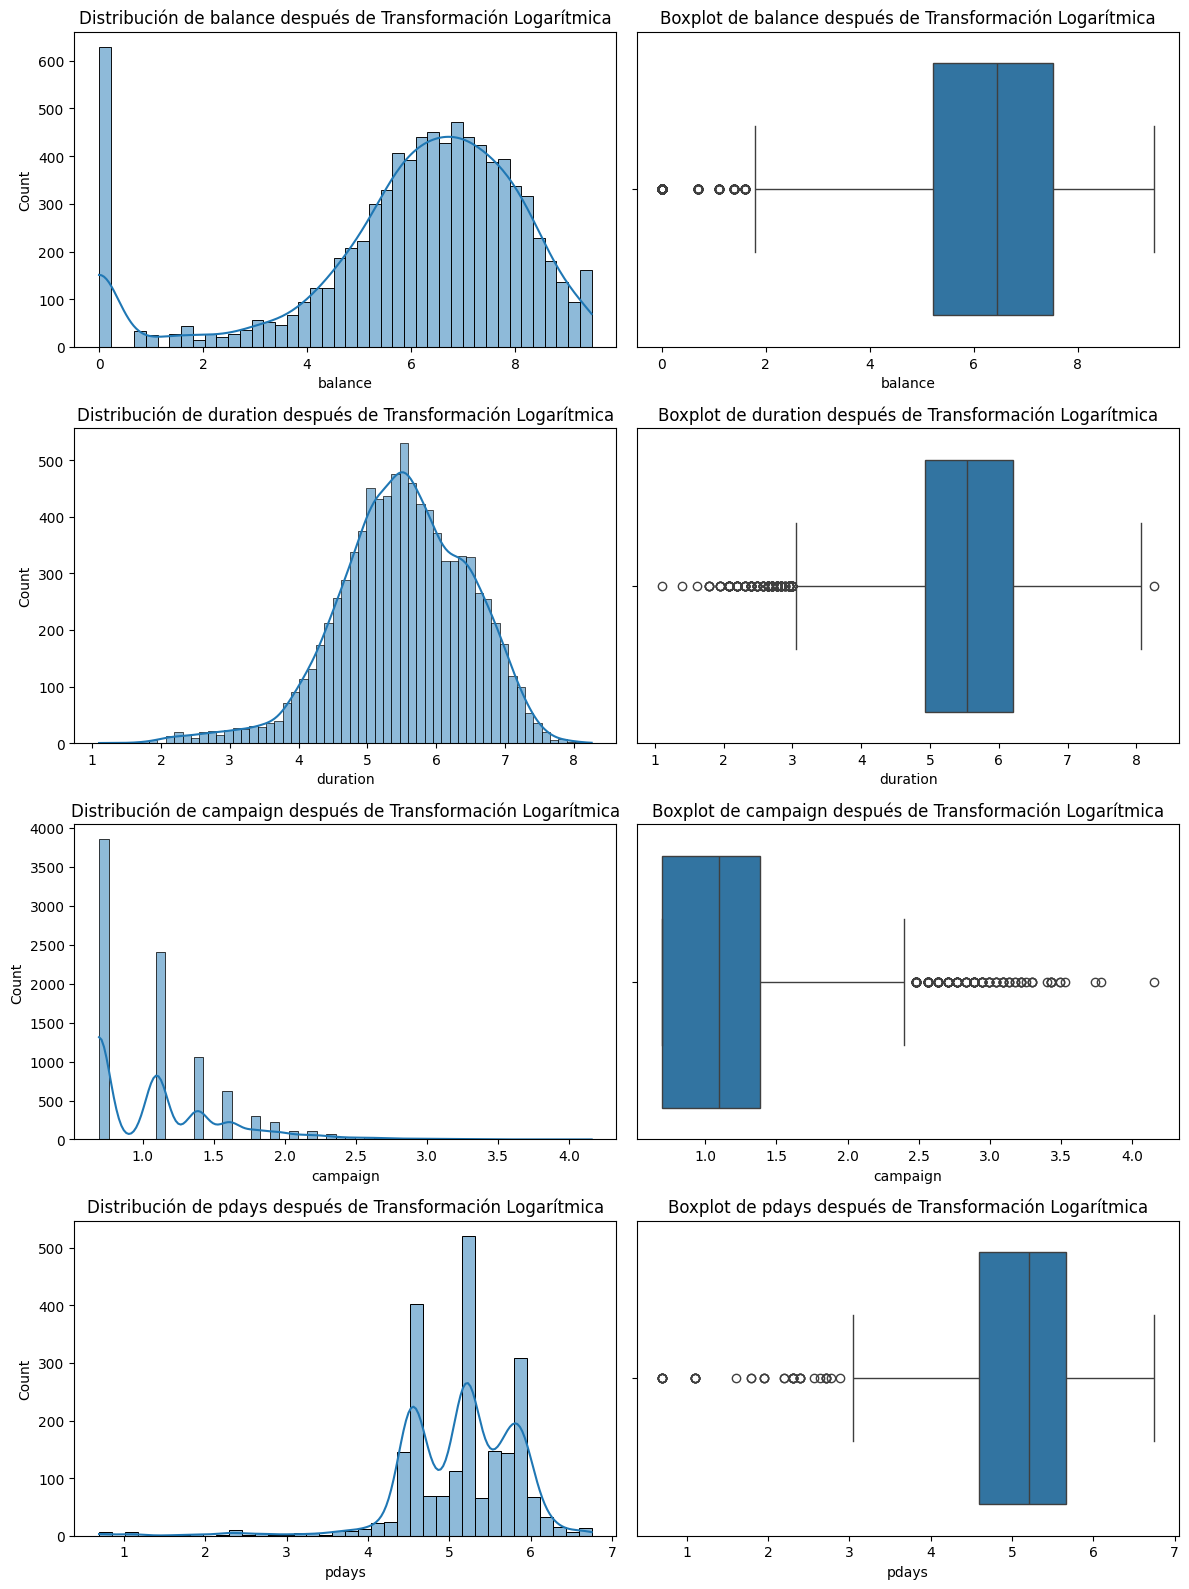

In [12]:
# Lista de variables transformadas logarítmicamente
log_transformed_vars = ['balance', 'duration', 'campaign', 'pdays']

# Crear subplots para histogramas y boxplots
fig, axes = plt.subplots(len(log_transformed_vars), 2, figsize=(12, len(log_transformed_vars) * 4))

for i, var in enumerate(log_transformed_vars):
    # Histograma con KDE para la distribución después de la transformación
    sns.histplot(X_train[var], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribución de {var} después de Transformación Logarítmica')
    
    # Boxplot para ver los posibles outliers después de la transformación
    sns.boxplot(x=X_train[var], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {var} después de Transformación Logarítmica')

# Ajuste de la visualización
plt.tight_layout()
plt.show()


Los gráficos muestran la distribución y la presencia de outliers después de la aplicación de la transformación logarítmica en las variables balance, duration, campaign, y pdays. A continuación, un análisis de los resultados:

* Balance:
La transformación logarítmica ha reducido parte del sesgo y mejorado la distribución, pero aún se observan algunos outliers en el extremo derecho.
La mayoría de los datos están concentrados en un rango moderado, con algunos valores más elevados que siguen destacándose como extremos.

* Duration:
La distribución de duration ahora es más simétrica tras la transformación logarítmica, lo que mejora su adecuación a los métodos de modelado.
Sin embargo, aún persisten algunos outliers, que pueden ser representativos de llamadas significativamente largas.

* Campaign:
A pesar de la transformación logarítmica, campaign sigue mostrando una concentración considerable en los valores más bajos, lo cual refleja el hecho de que la mayoría de los clientes son contactados pocas veces.
Los outliers permanecen en el extremo derecho, indicando clientes que fueron contactados muchas veces, lo que puede ser una información útil para el modelo.

* Pdays:
La transformación ha mejorado ligeramente la distribución de pdays, aunque sigue mostrando una estructura de múltiples picos debido a los días de contacto específico.
Los outliers en pdays se mantienen, pero la transformación ayuda a que la variable esté menos sesgada y sea más manejable.

# 8. Escalado de Variables Numéricas

Se escalaron las variables para ponerlas en una escala similar, lo cual es importante para evitar que el modelo dé más peso a variables con rangos mayores. Dado que muchas variables numéricas no seguían una distribución normal y contenían outliers, sé utilizó RobustScaler para estas, ya que es menos sensible a valores extremos. Para las variables sin outliers significativos, sé utilizó MinMaxScaler, que las normaliza entre 0 y 1, ayudando a mantener la homogeneidad en los datos sin alterar su distribución

In [13]:
# Variables con y sin outliers
outlier_features = ['balance', 'duration', 'pdays']
non_outlier_features = ['age', 'campaign', 'previous']

In [14]:
# Reemplazar valores infinitos resultantes de la transformación logarítmica
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Imputar valores nulos que resultaron de la transformación
X_train[outlier_features] = X_train[outlier_features].fillna(X_train[outlier_features].median())
X_test[outlier_features] = X_test[outlier_features].fillna(X_train[outlier_features].median())

In [15]:
# Escalar variables con outliers
robust_scaler = RobustScaler()
X_train[outlier_features] = robust_scaler.fit_transform(X_train[outlier_features])
X_test[outlier_features] = robust_scaler.transform(X_test[outlier_features])

In [16]:
# Escalar variables sin outliers en entrenamiento y prueba
minmax_scaler = MinMaxScaler()
X_train[non_outlier_features] = minmax_scaler.fit_transform(X_train[non_outlier_features])
X_test[non_outlier_features] = minmax_scaler.transform(X_test[non_outlier_features])

# 9. Codificación de Variables Categóricas

Se utilizó get_dummies para convertir las variables categóricas en valores numéricos a través de One-Hot Encoding, lo que permite al modelo interpretar estas categorías de forma efectiva sin imponer un orden artificial entre ellas.

In [17]:
# Aplicar One-Hot Encoding en el conjunto de entrenamiento y prueba
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Alinear las columnas entre X_train y X_test para asegurarse de que tengan la misma estructura
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 10. Visualizaciones X_train y X_test

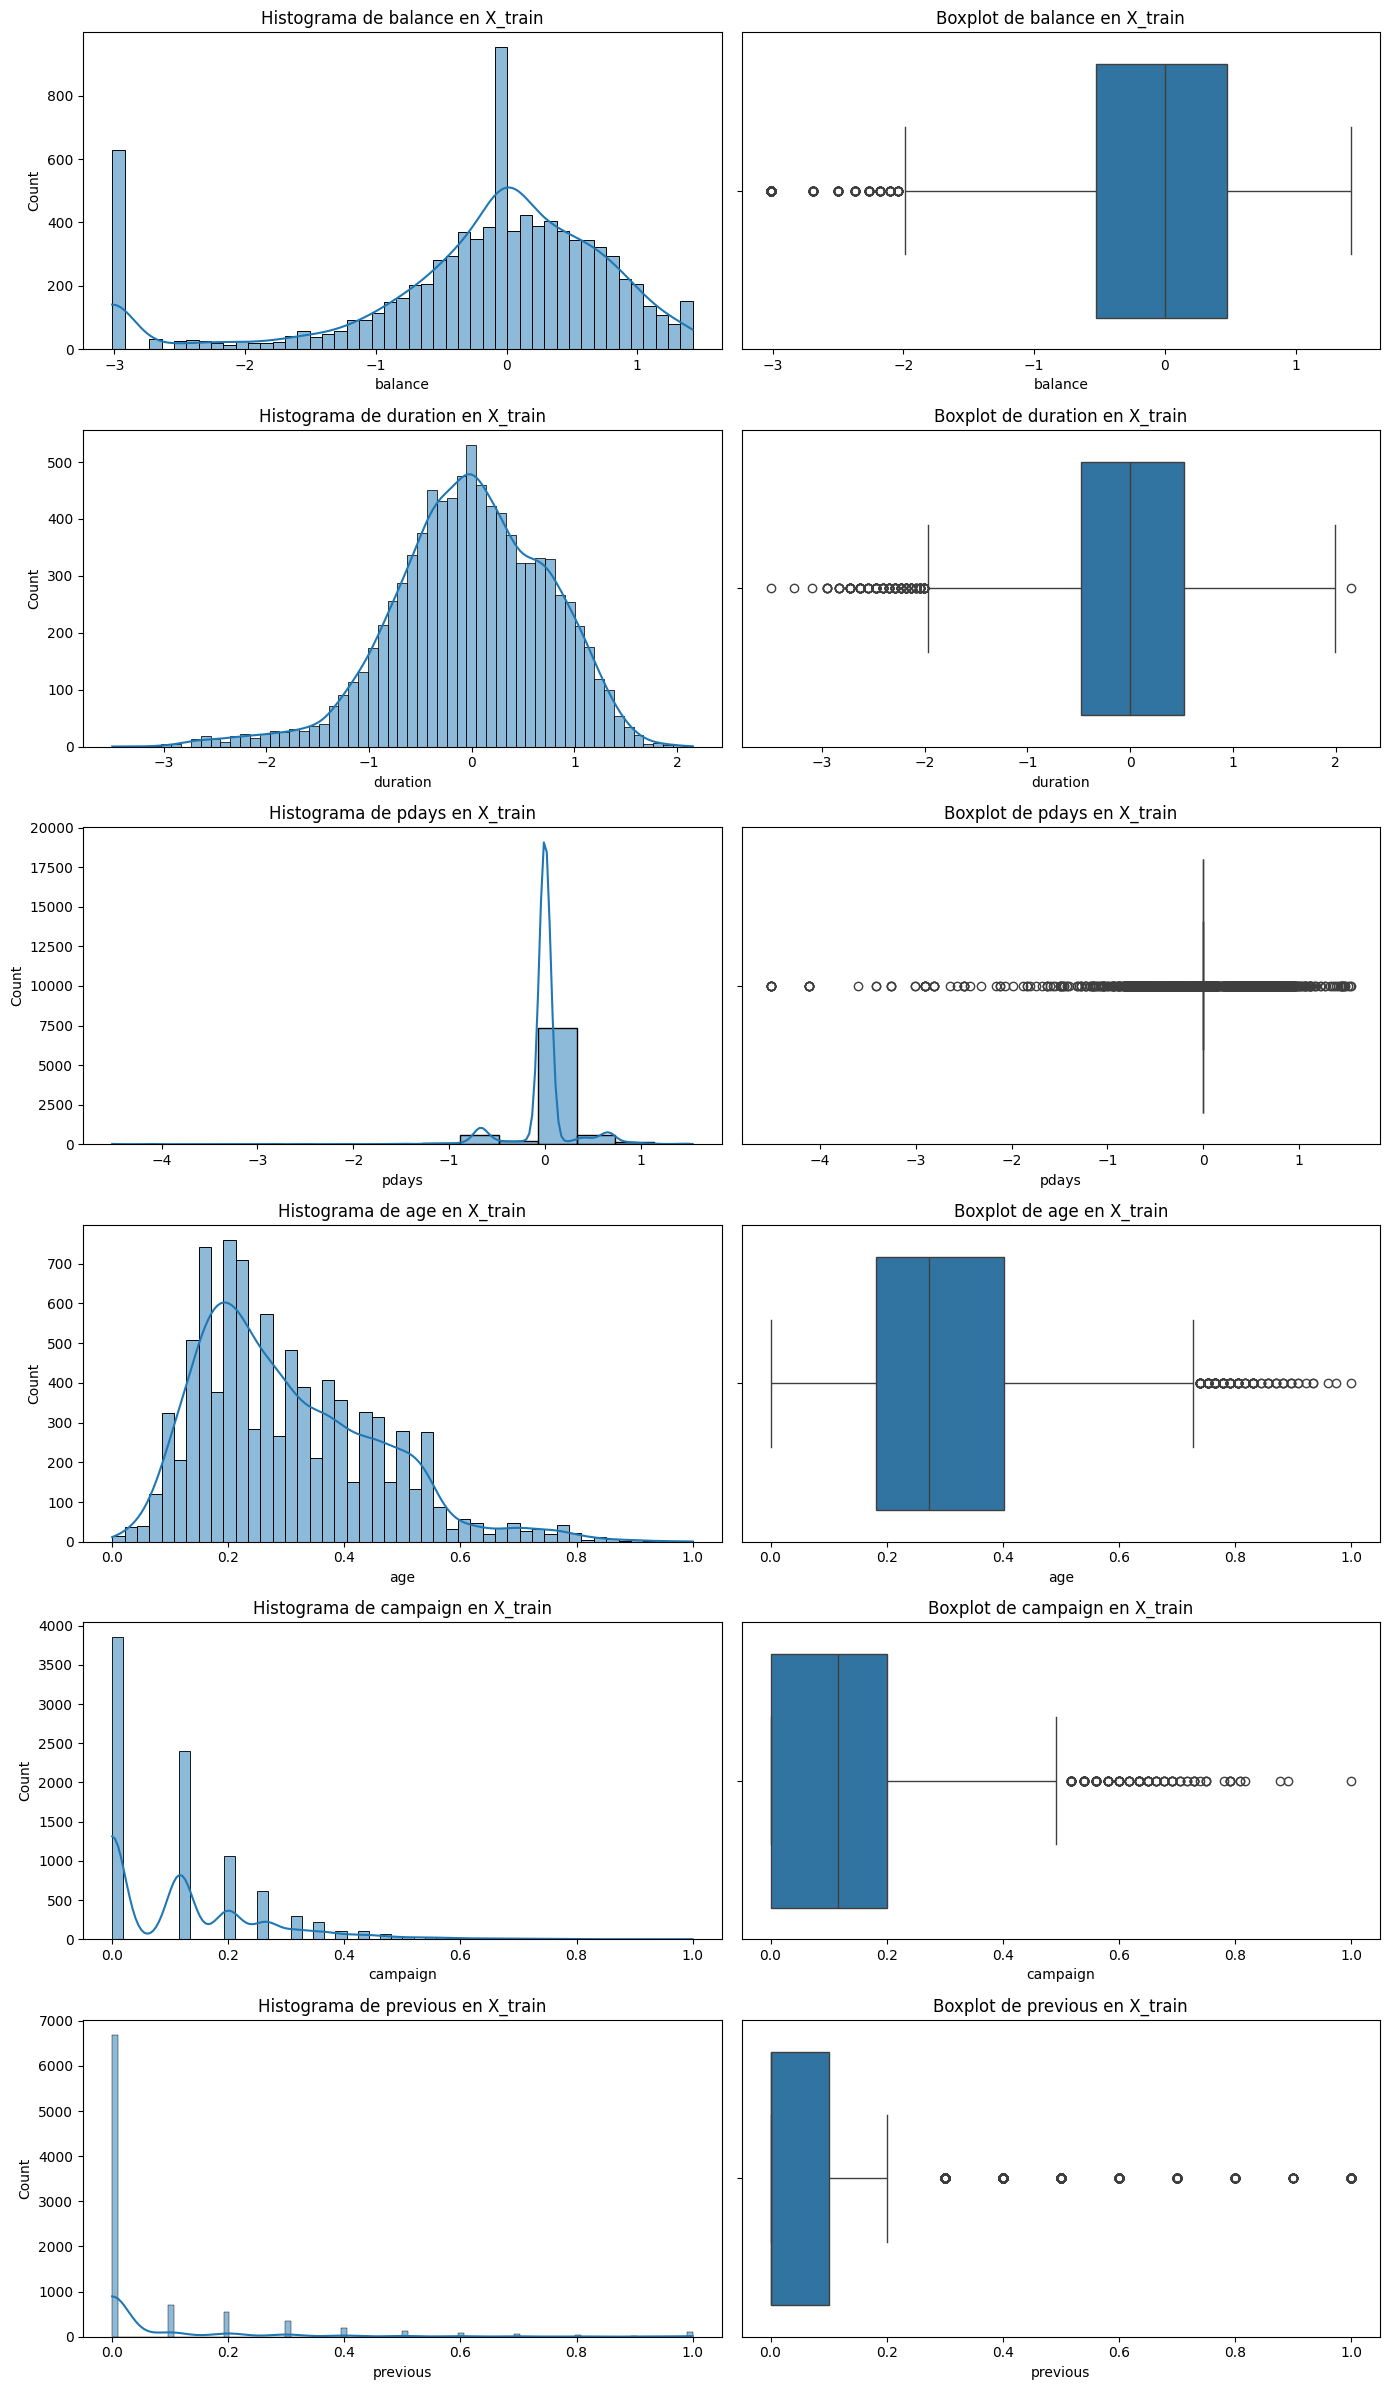

In [18]:
# Listas de variables numéricas
numerical_features = outlier_features + non_outlier_features

# Crear figura para histogramas y boxplots de X_train
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(14, 4 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    # Histograma para X_train
    sns.histplot(X_train[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {feature} en X_train')
    
    # Boxplot para X_train
    sns.boxplot(x=X_train[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {feature} en X_train')

plt.tight_layout()
plt.show()

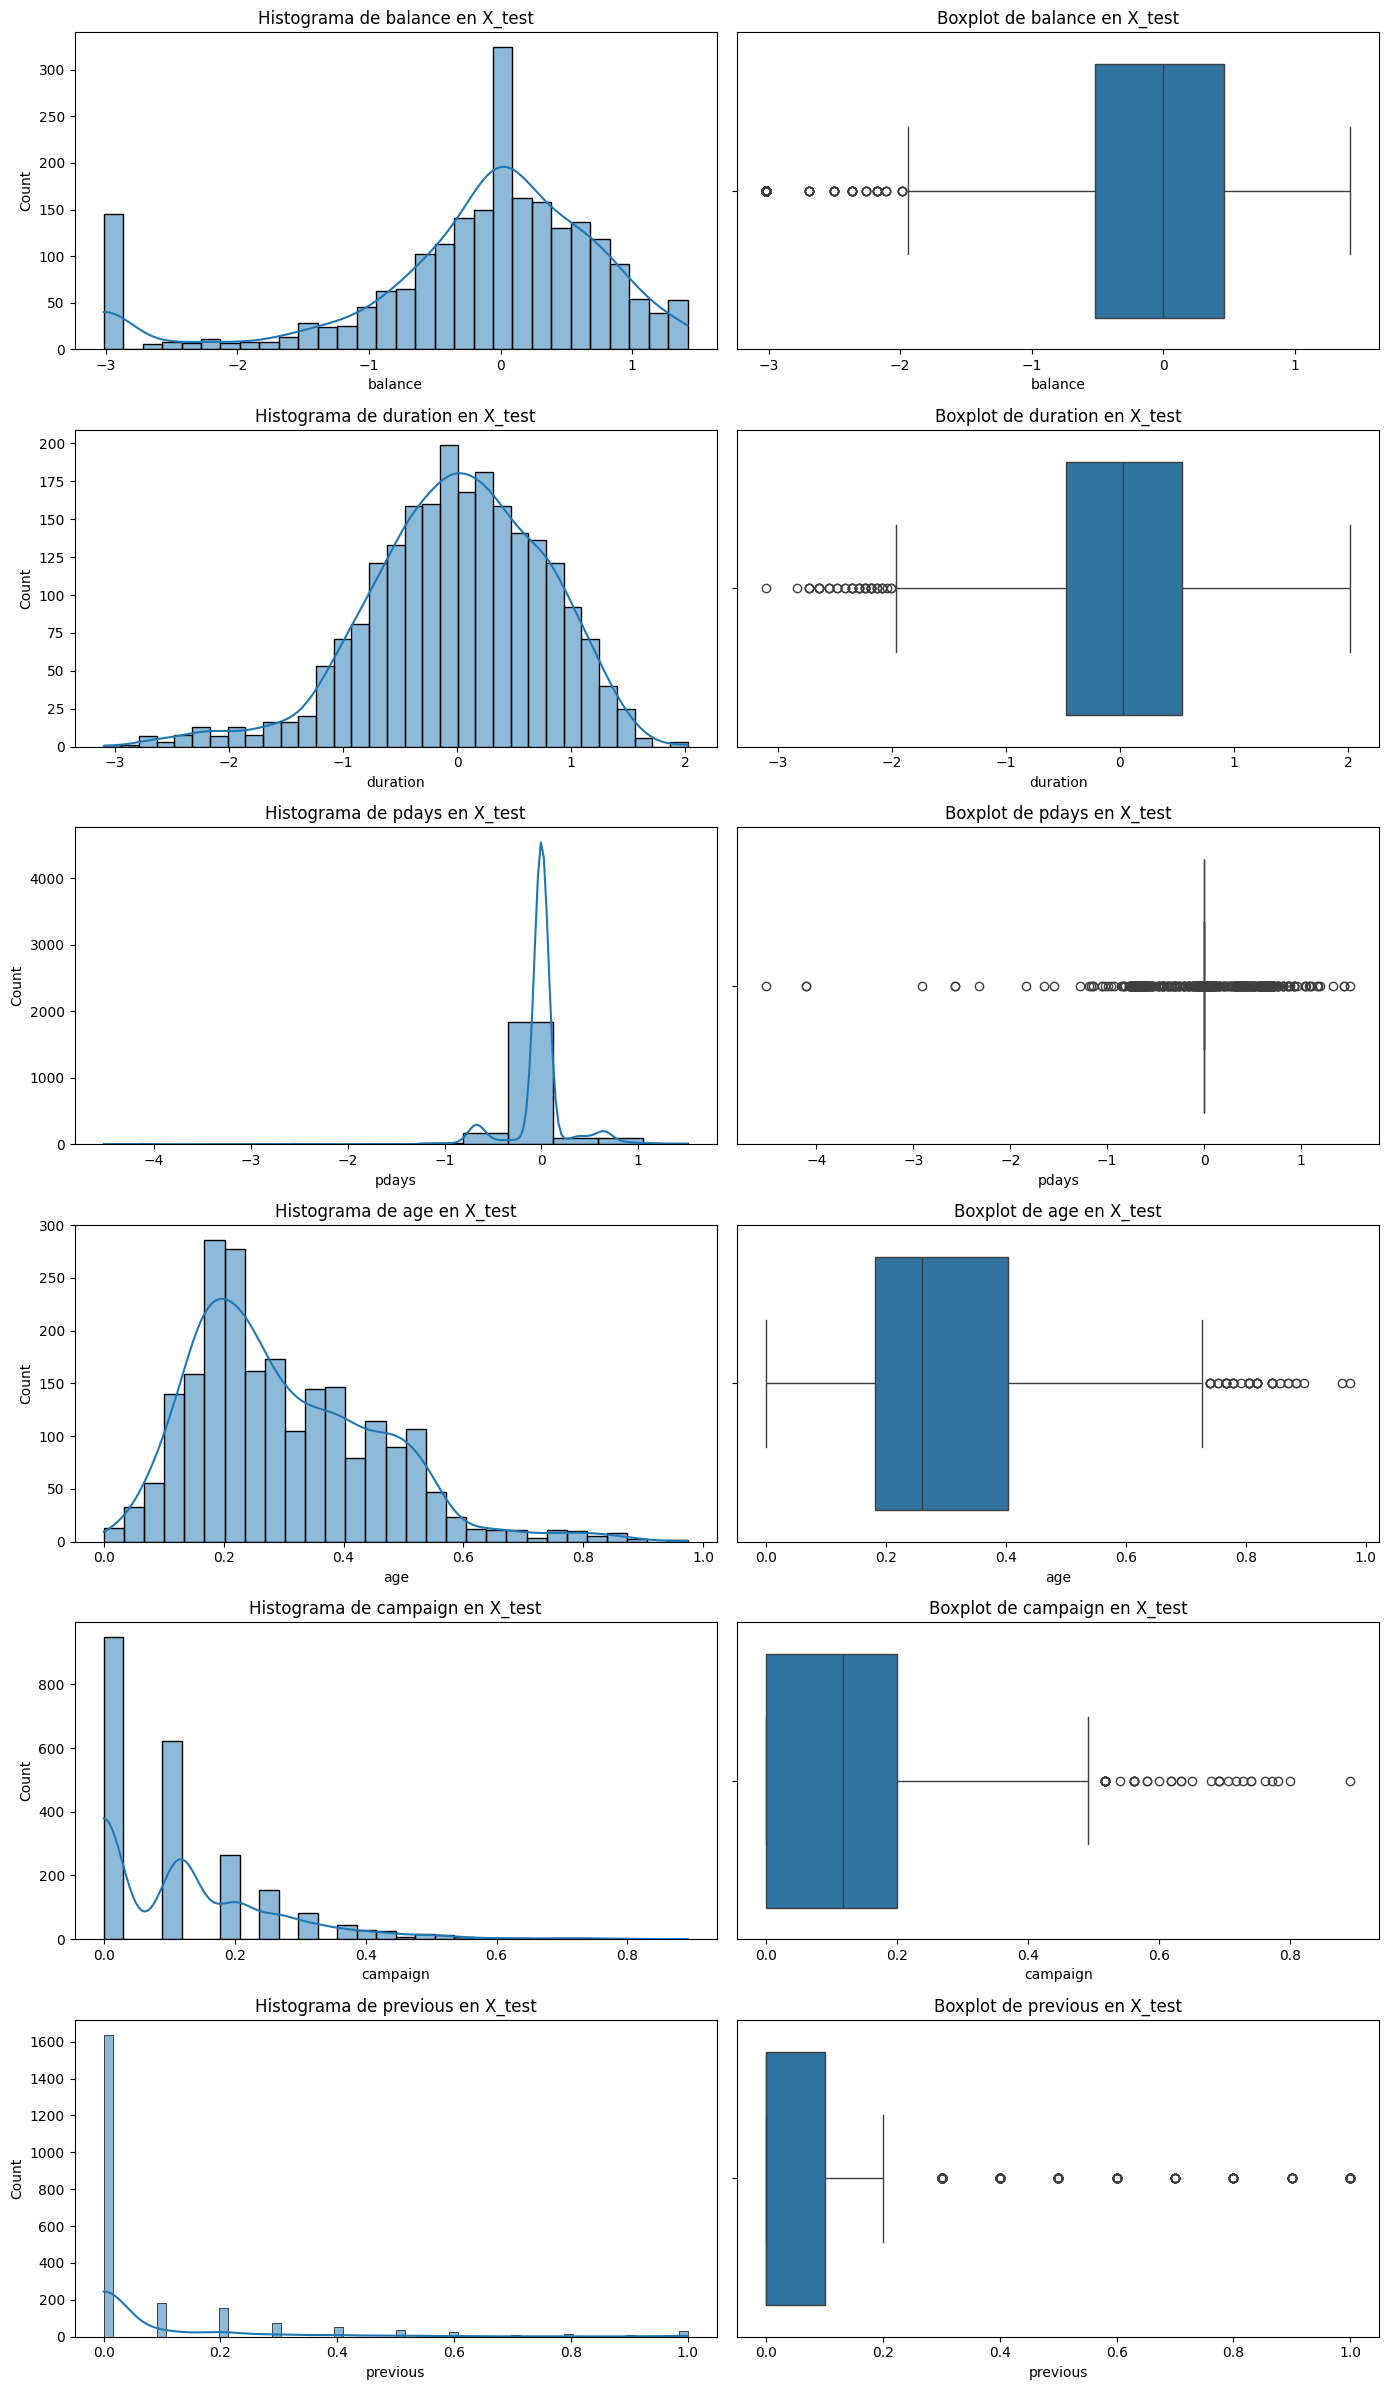

In [19]:
# Crear figura para histogramas y boxplots de X_test
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(14, 4 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    # Histograma para X_test
    sns.histplot(X_test[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {feature} en X_test')
    
    # Boxplot para X_test
    sns.boxplot(x=X_test[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {feature} en X_test')

plt.tight_layout()
plt.show()

# 11. Aplicación de PCA 

Aplicamos PCA para reducir la dimensionalidad, si la cantidad de características es muy alta y podría afectar el rendimiento del modelo.

In [20]:
# Verificar la cantidad de características actuales:
print(f"Número de características después de la codificación: {X_train.shape[1]}")

Número de características después de la codificación: 53


Con 53 características después de la codificación, aplicar PCA puede ser una buena opción para reducir la dimensionalidad, especialmente si se desea simplificar el modelo y reducir la redundancia de información.

Configurar PCA para Mantener el 99% de la Varianza: Utilizaremos PCA para conservar el 99% de la varianza, lo que debería reducir el número de características al mínimo necesario para capturar la mayoría de la información de los datos.

In [21]:
# Configuramos PCA para mantener el 95% de la varianza
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Imprimir el número de componentes seleccionados
print(f"Número de componentes después de aplicar PCA: {X_train_pca.shape[1]}")

Número de componentes después de aplicar PCA: 21


In [22]:
varianza_explicada = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", varianza_explicada)
print("Varianza explicada acumulada:", sum(varianza_explicada))


Varianza explicada por cada componente: [0.91795939 0.01431541 0.0089723  0.00725574 0.00598121 0.00547581
 0.00481551 0.00332141 0.00282852 0.00269478 0.00206242 0.00198875
 0.00194133 0.00178854 0.00163426 0.0014701  0.00133159 0.00127548
 0.00124895 0.00110529 0.00103551]
Varianza explicada acumulada: 0.9905022960258155


Estos resultados indican que el primer componente principal explica aproximadamente el 91.8% de la varianza total, lo que sugiere que una gran parte de la información en el conjunto de datos se concentra en esa primera dimensión. Sin embargo, al conservar los 21 componentes, se alcanza el 99.05% de la varianza acumulada, lo que asegura que casi toda la información relevante del conjunto de datos original está presente en esta versión reducida.

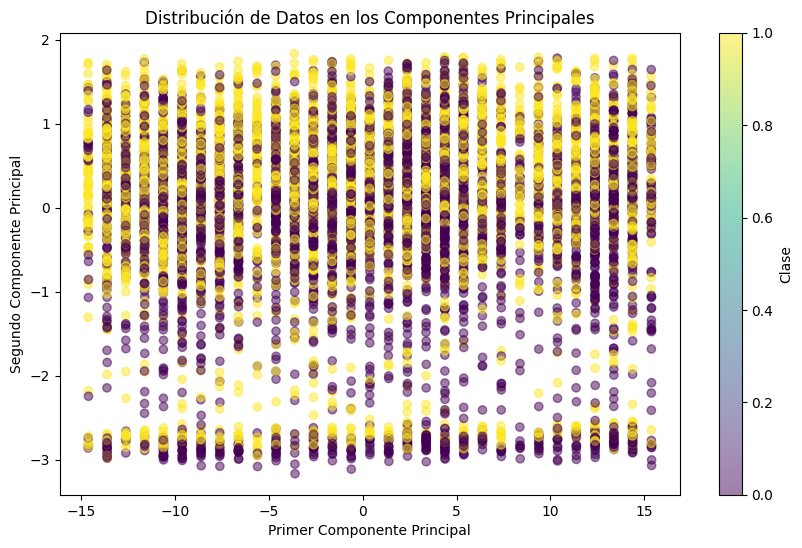

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.xlabel("Primer Componente Principal")
plt.ylabel("Segundo Componente Principal")
plt.title("Distribución de Datos en los Componentes Principales")
plt.colorbar(label="Clase")
plt.show()

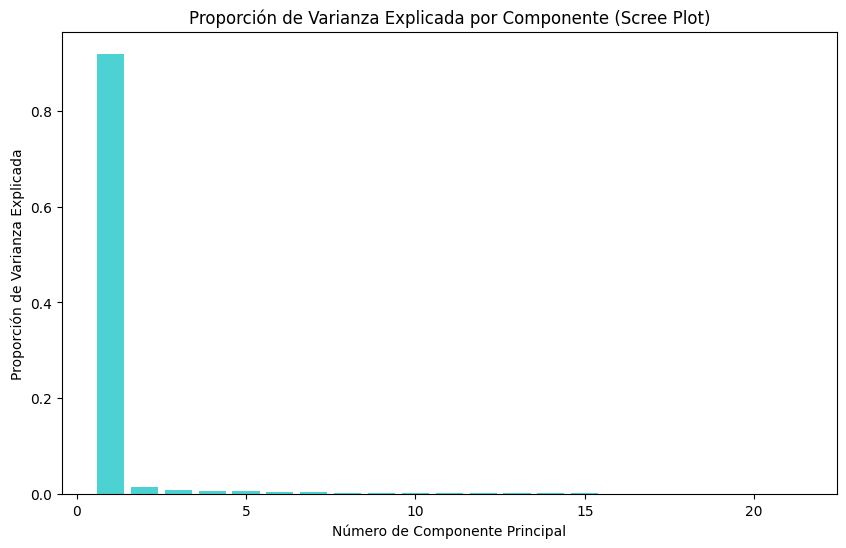

In [24]:
# Varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='c', alpha=0.7)
plt.xlabel("Número de Componente Principal")
plt.ylabel("Proporción de Varianza Explicada")
plt.title("Proporción de Varianza Explicada por Componente (Scree Plot)")
plt.show()

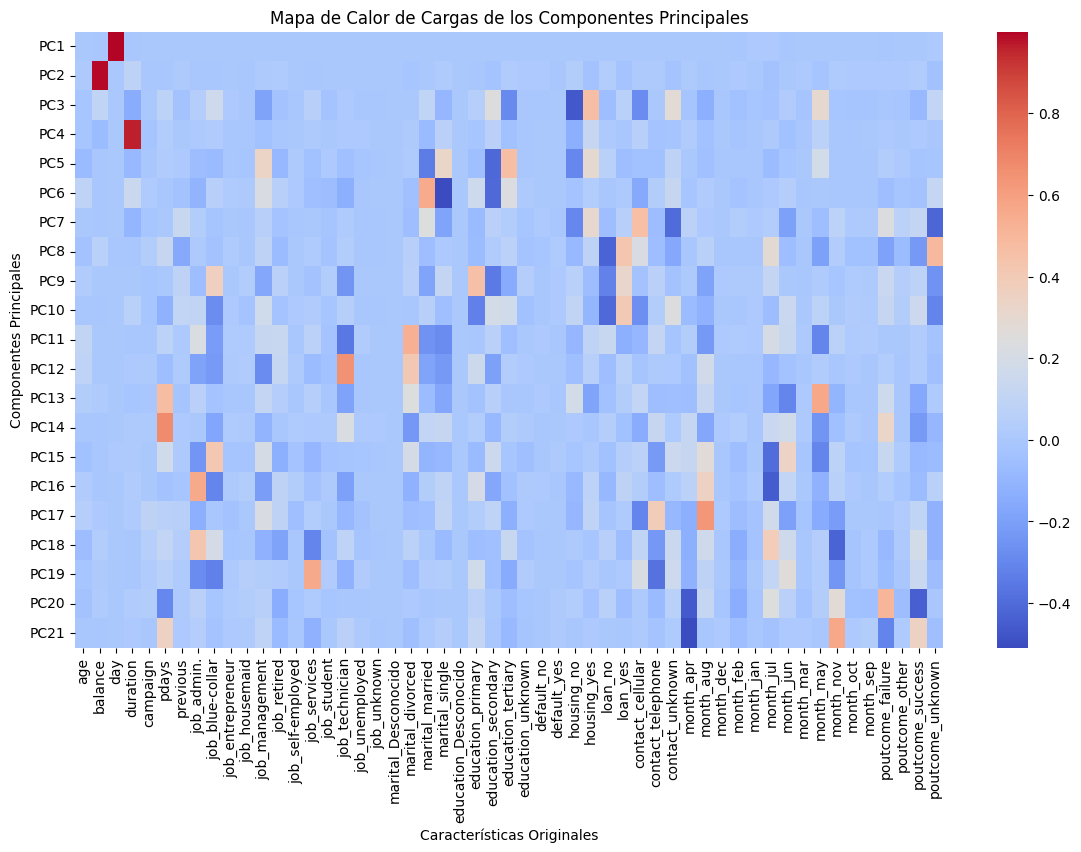

In [27]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    pca.components_, 
    cmap='coolwarm', 
    annot=False,  # Desactiva las anotaciones numéricas
    xticklabels=X_train.columns, 
    yticklabels=[f"PC{i+1}" for i in range(pca.n_components_)]
)
plt.xlabel("Características Originales")
plt.ylabel("Componentes Principales")
plt.title("Mapa de Calor de Cargas de los Componentes Principales")
plt.show()

En conjunto, los gráficos sugieren que el uso de PCA permite una significativa reducción de la dimensionalidad manteniendo una gran parte de la varianza. Sin embargo, debido a la falta de una clara separación de clases en el gráfico de dispersión de los dos primeros componentes, es probable que se necesiten varios componentes adicionales para capturar relaciones complejas en los datos. La combinación de componentes permite construir una representación completa de los datos sin la redundancia de las variables originales, lo cual facilita el modelado sin perder información crítica.

# 12. Próximos pasos

Con base en el análisis de los gráficos resultantes después de las imputaciones, transformaciones y el análisis de componentes principales (PCA), se recomienda entrenar y evaluar modelos tanto con el conjunto de datos completo como con la versión reducida de 21 componentes obtenida mediante PCA. Este enfoque permitirá comparar el desempeño de ambos enfoques y determinar cuál modelo es el más eficiente en términos de precisión y tiempo de procesamiento. La comparación entre los modelos ayudará a identificar si la reducción de dimensionalidad mediante PCA contribuye a un mejor rendimiento sin sacrificar precisión en la predicción.